# TP Integrador de Big Data / Data Science

Gustavo Navarro - Comisión 22608 - Enero 2023

<center><img src="Data-Science.jpg"></center>

## Análisis exploratorio

In [1]:
#Importar las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Carga de datos

In [27]:
df = pd.read_csv('/work/exams.csv')
df

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0


In [3]:
# las primeras 5 filas
df.head()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0


In [4]:
#Las últimas filas del dataframe
df.tail()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0
1017,13-3347050,male,group D,some college,standard,no,completed,70.0,60.0,65.0,65.0


### Resumen estadístico

In [5]:
df.describe()

,math score,physics score,chemistry score,algebra_score
count,1011.000000,1011.000000,1011.000000,1011.000000
mean,66.480712,69.063304,67.789318,67.778437
std,15.326880,14.694107,15.559853,14.450680
min,13.000000,27.000000,23.000000,22.000000
25%,56.000000,60.000000,58.000000,59.000000
50%,67.000000,70.000000,68.000000,68.000000
75%,77.000000,79.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000,100.000000


In [6]:
#Revisar los tipos de datos
df.dtypes

id                              object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
employed                        object
test preparation course         object
math score                     float64
physics score                  float64
chemistry score                float64
algebra_score                  float64
dtype: object

## Limpieza y ordenamiento de datos

### Encontrar las filas duplicadas

In [7]:
print(f'Original: {df.id.count()} filas')
duplicate_rows_df = df[df.duplicated()]
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.id.count()}')

#Eliminar los duplicados
df = df.drop_duplicates()

Original: 1018 filas
Cantidad de filas duplicadas: 18


In [8]:
#Cantidad de filas despues de eliminar los duplicados
print(f'Final: {df.id.count()} filas')

Final: 1000 filas


In [9]:
#Eliminar las columnas irrelevantes
print(df.columns)
df =df.drop(['id'], axis=1)

Index(['id', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'employed', 'test preparation course', 'math score',
       'physics score', 'chemistry score', 'algebra_score'],
      dtype='object')


In [25]:
print(df.columns)

Index(['Gender', 'Ethnicity', 'Parental level of education', 'Lunch',
       'Employed', 'Test preparation course', 'Math score', 'Physics score',
       'Chemistry score', 'Algebra score', 'Average score'],
      dtype='object')


### Renombrar las columnas

In [24]:
df = df.rename(columns = {
'gender': 'Gender',
'race/ethnicity': 'Ethnicity',
'parental level of education': 'Parental level of education',
'lunch': 'Lunch',
'employed': 'Employed',
'test preparation course': 'Test preparation course',
'math score': 'Math score',
'physics score': 'Physics score',
'chemistry score': 'Chemistry score',
'algebra_score': 'Algebra score'})
df.columns

Index(['Gender', 'Ethnicity', 'Parental level of education', 'Lunch',
       'Employed', 'Test preparation course', 'Math score', 'Physics score',
       'Chemistry score', 'Algebra score', 'Average score'],
      dtype='object')

### Eliminación de valores perdidos o nulos

In [12]:
#Encontrar los valores nulos
print(df.isnull().sum())

#Eliminar los valores perdidos
df = df.dropna()
print()

#Despues de eliminar los nulos
print(df.isnull().sum())

Gender                         0
Ethnicity                      0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     7
Physics score                  7
Chemistry score                7
Algebra score                  7
dtype: int64

Gender                         0
Ethnicity                      0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     0
Physics score                  0
Chemistry score                0
Algebra score                  0
dtype: int64


### Detectar los valores outliers

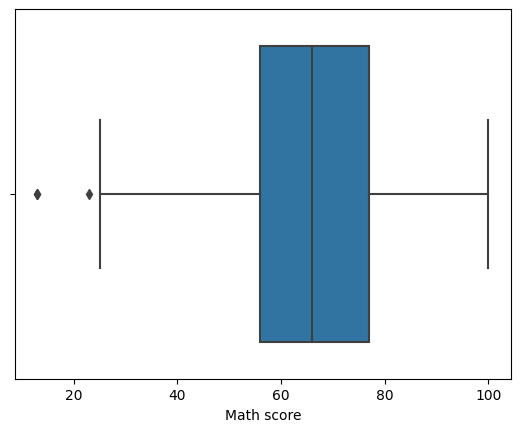

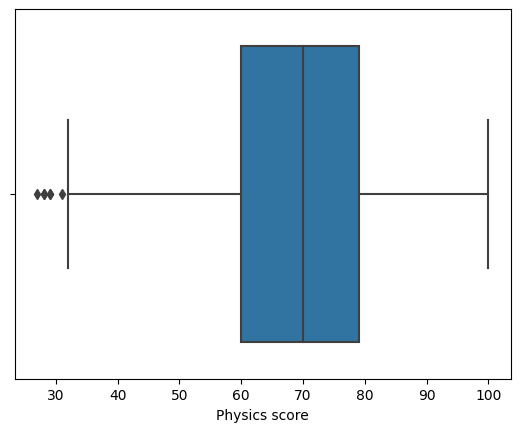

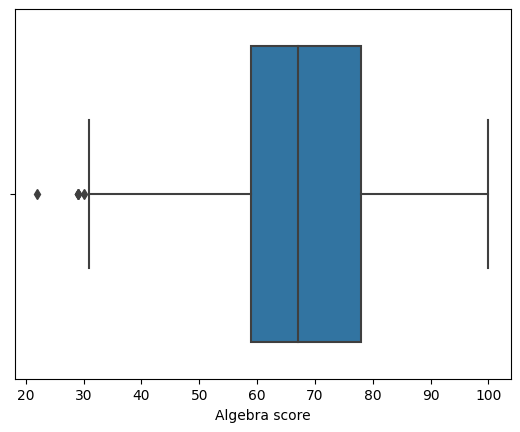

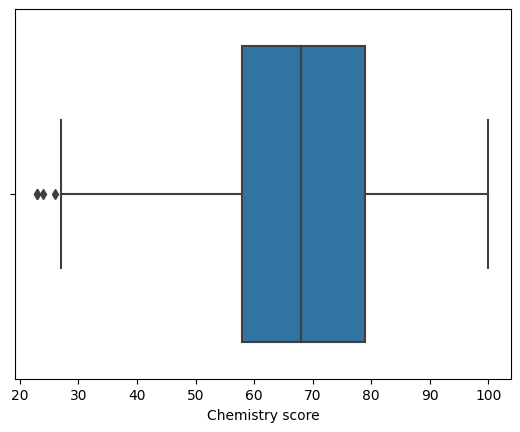

In [13]:
sns.boxplot(x=df['Math score'])
plt.show()
sns.boxplot(x=df['Physics score'])
plt.show()
sns.boxplot(x=df['Algebra score'])
plt.show()
sns.boxplot(x=df['Chemistry score'])
plt.show()

In [14]:
print(f'Antes: {df.Lunch.count()} filas\n')
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]
print(f'\nDespues: {df.Lunch.count()} filas')

Antes: 993 filas

Math score         21.0
Physics score      19.0
Chemistry score    21.0
Algebra score      19.0
dtype: float64

Despues: 984 filas
/tmp/ipykernel_76/434115097.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]
/tmp/ipykernel_76/434115097.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]


## Visualización de los datos obtenidos

### Encontrar correlaciones y frecuencias

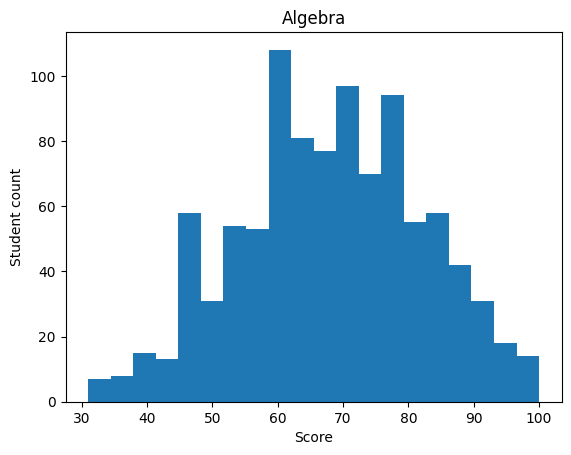

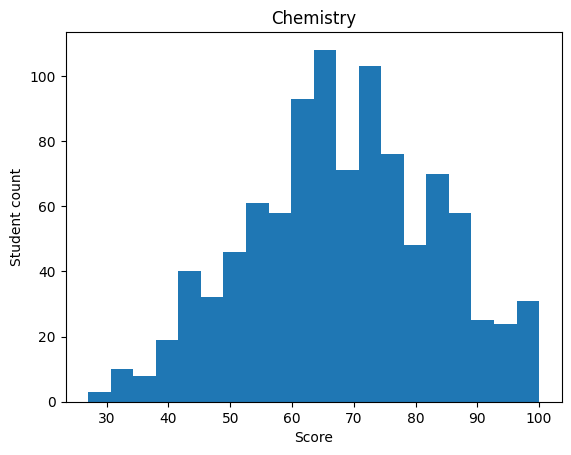

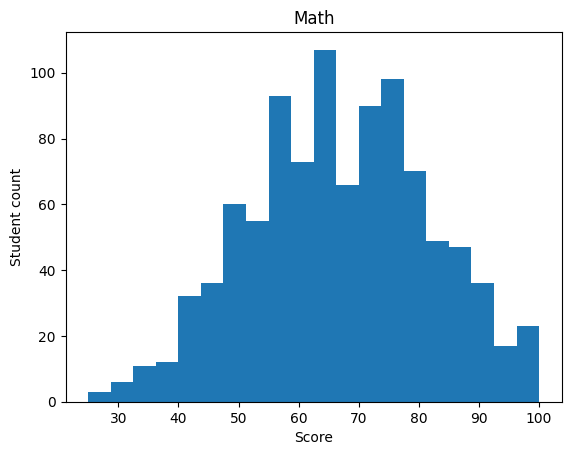

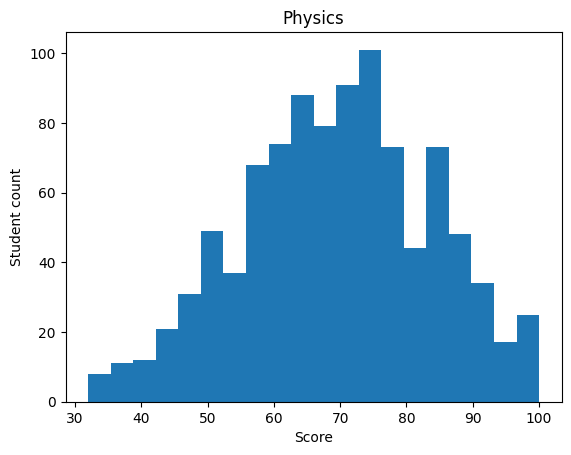

In [15]:
plt.hist(df['Algebra score'], bins=20)
plt.title('Algebra')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Chemistry score'], bins=20)
plt.title('Chemistry')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Math score'], bins=20)
plt.title('Math')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Physics score'], bins=20)
plt.title('Physics')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

In [16]:
#Correlacion entre los datos = mapa de calor
c = df.corr()
print(c)

                 Math score  Physics score  Chemistry score  Algebra score
Math score         1.000000       0.812055         0.798312       0.916674
Physics score      0.812055       1.000000         0.951536       0.968358
Chemistry score    0.798312       0.951536         1.000000       0.964652
Algebra score      0.916674       0.968358         0.964652       1.000000


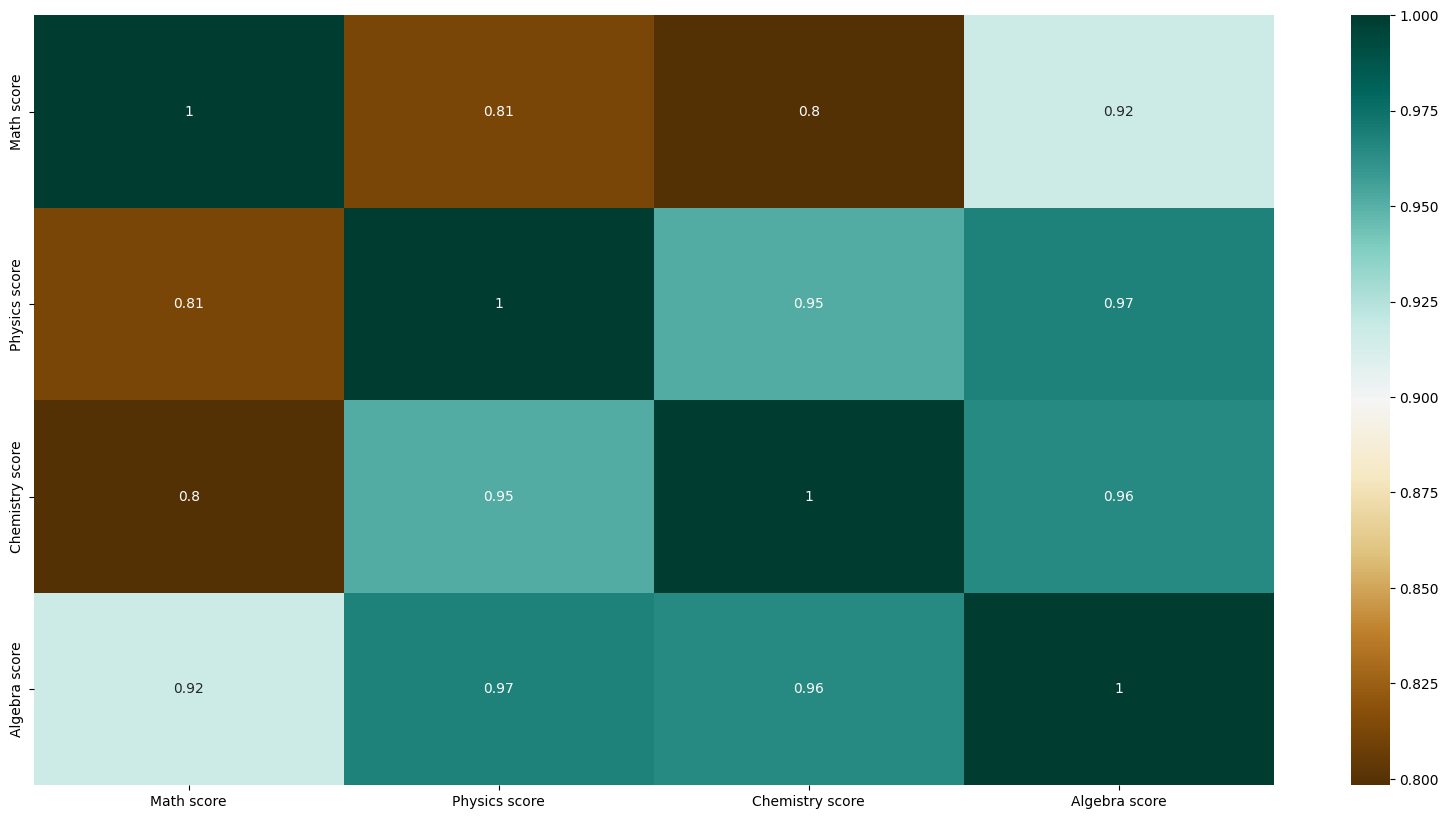

In [17]:
plt.figure(figsize= (20, 10))
sns.heatmap(c, cmap='BrBG', annot=True)
plt.show()

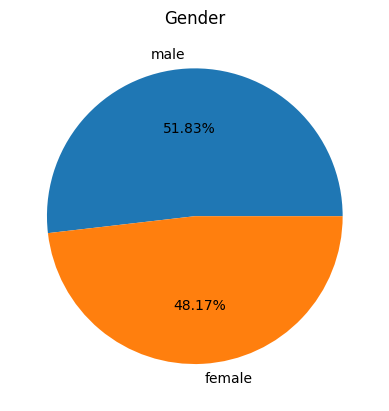

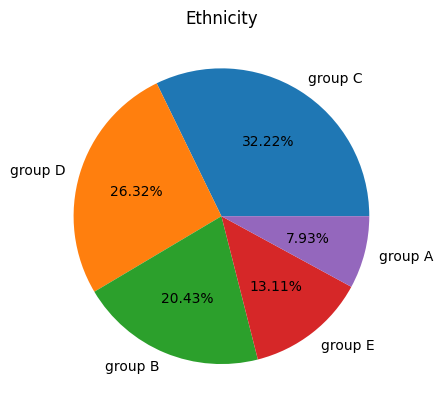

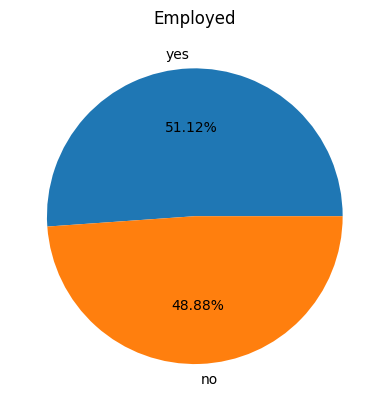

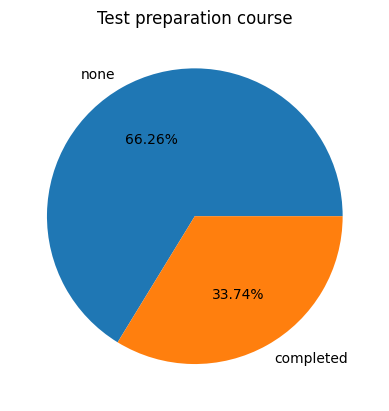

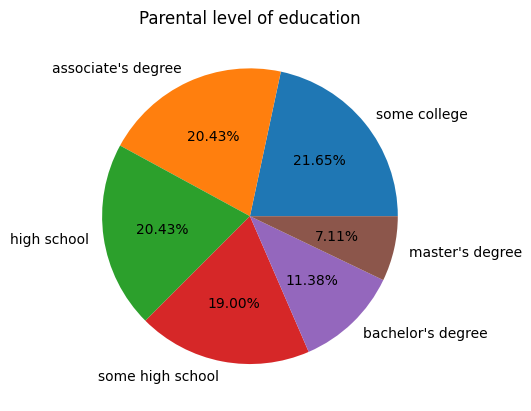

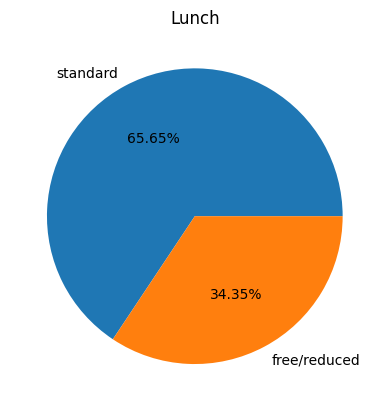

In [18]:
#pandas.value_counts()-> devuelve una serie de valores unicos en un orden descendente de frecuencia
labels = df['Gender'].value_counts().index
sizes = df['Gender'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Gender')
plt.show()

#Repetimos para Etnia, empleo y el resto de las variables categóricas
labels = df['Ethnicity'].value_counts().index
sizes = df['Ethnicity'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Ethnicity')
plt.show()

labels = df['Employed'].value_counts().index
sizes = df['Employed'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Employed')
plt.show()

labels = df['Test preparation course'].value_counts().index
sizes = df['Test preparation course'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Test preparation course')
plt.show()

labels = df['Parental level of education'].value_counts().index
sizes = df['Parental level of education'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Parental level of education')
plt.show()

labels = df['Lunch'].value_counts().index
sizes = df['Lunch'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Lunch')
plt.show()

## Respondiendo preguntas

### ¿Hay alguna relación entre el promedio de notas obtenidas y el hecho de haber realizado el curso preparatorio?

In [19]:
#axis=1 hace que se aplique la función sobre los valores numericos de la fila en vez de las columnas
df['Average score'] = df.mean(axis=1)
df

,Gender,Ethnicity,Parental level of education,Lunch,Employed,Test preparation course,Math score,Physics score,Chemistry score,Algebra score,Average score
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0,65.75
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0,51.25
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0,56.25
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0,74.25
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0,73.00
...,...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0,69.25
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0,89.25
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0,36.00
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0,76.25


In [20]:
si = df[df['Test preparation course'] == 'completed']
no = df[df['Test preparation course'] == 'none']

### Cantidad de alumnos que hicieron y que no hicieron el curso preparatorio

In [21]:
print('Realizaron el curso:', si['Test preparation course'].count())
print('No realizaron el curso:', no['Test preparation course'].count())

Realizaron el curso: 332
No realizaron el curso: 652


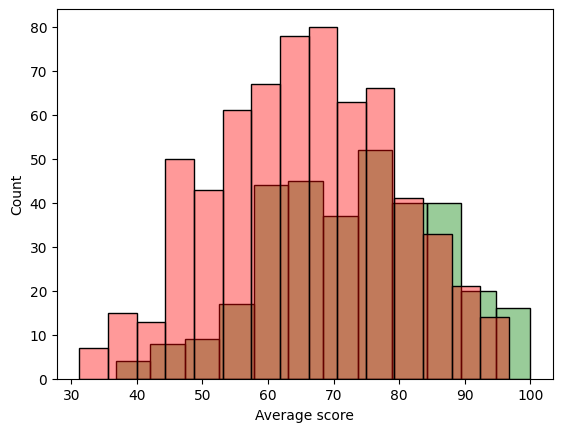

In [22]:
sns.histplot(si['Average score'], color = 'green', alpha= .4, fill = True)
sns.histplot(no['Average score'], color = 'red', alpha= .4, fill = True)
plt.show()

### Promedio de notas de los alumnos que hicieron y no hicieron el curso preparatorio

In [28]:
df.drop(['id', 'gender','race/ethnicity', 'parental level of education', 'lunch', 'employed'], axis = 'columns', inplace=True)
df

,test preparation course,math score,physics score,chemistry score,algebra_score
0,completed,67.0,67.0,63.0,66.0
1,none,40.0,59.0,55.0,51.0
2,none,59.0,60.0,50.0,56.0
3,none,77.0,78.0,68.0,74.0
4,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...
1013,none,74.0,73.0,67.0,71.0
1014,none,78.0,84.0,77.0,80.0
1015,completed,78.0,78.0,74.0,77.0
1016,none,75.0,76.0,81.0,77.0


In [29]:
df =df.round(2)
df

,test preparation course,math score,physics score,chemistry score,algebra_score
0,completed,67.0,67.0,63.0,66.0
1,none,40.0,59.0,55.0,51.0
2,none,59.0,60.0,50.0,56.0
3,none,77.0,78.0,68.0,74.0
4,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...
1013,none,74.0,73.0,67.0,71.0
1014,none,78.0,84.0,77.0,80.0
1015,completed,78.0,78.0,74.0,77.0
1016,none,75.0,76.0,81.0,77.0


In [30]:
df.groupby(['test preparation course']).mean().round(2)

,math score,physics score,chemistry score,algebra_score
test preparation course,,,,
completed,69.84,74.18,74.75,72.94
none,64.78,66.47,64.26,65.16


### Conclusión

Si bien la cantidad de alumnos que no realizaron el curso duplicaron a los que si lo hicieron, esta diferencia no se ve reflejada significativamente en el promedio de las notas. Dicha diferencia es entre 5 y 10 puntos según la materia. Lo cual nos indica que no es necesariamente obligatorio el curso preparatorio.

Se recomienda auditar el contenido del curso, a fin de lograr un mejor rendimiento en el nivel académico e incrementar el interés del alumnado.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=732081dd-d00e-442d-8369-cce613d2444d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>